In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def display_img(img,cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

In [5]:
sep_coins = cv2.imread('DATA/pennies.jpg')

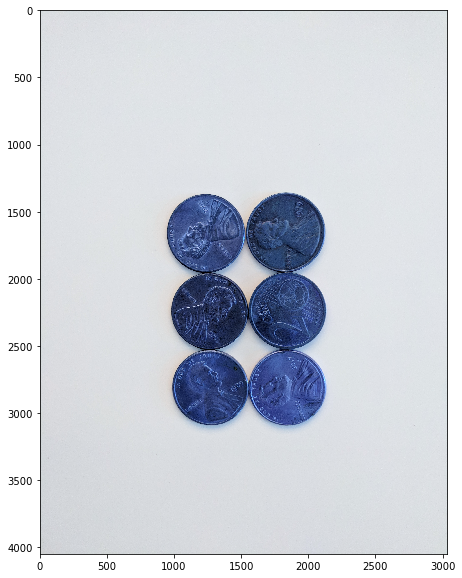

In [6]:
display_img(sep_coins)

In [7]:
###### STEPS ######

# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

In [8]:
sep_blur = cv2.medianBlur(sep_coins,25)

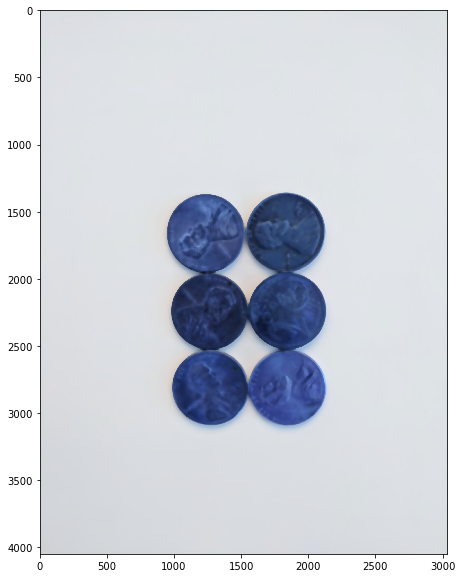

In [9]:
display_img(sep_blur)

In [10]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

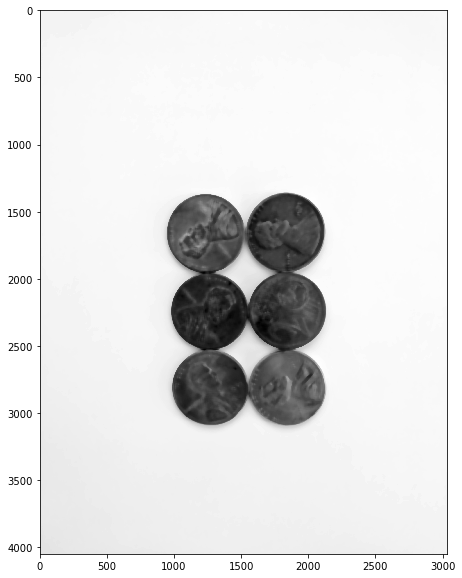

In [11]:
display_img(gray_sep_coins)

In [18]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

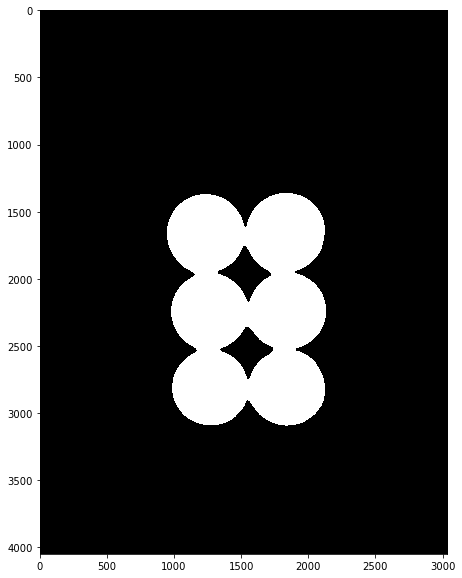

In [19]:
display_img(sep_thresh)

In [20]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [21]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

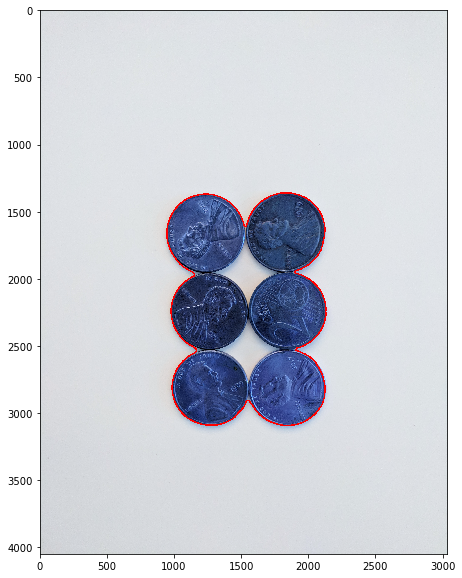

In [23]:
display_img(sep_coins)